<a href="https://colab.research.google.com/github/Bandi-Lavanya/ML-Assignment/blob/main/ML_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ML- CUSTTOMER CHURN PREDICTIONS:


### Importing the Necessary Libraries

In [ ]:
import pandas as pd # used for data analysis and manipulation
import numpy as np # used to perform numerical operations
import matplotlib.pyplot as plt # For data visualization
from sklearn.model_selection import train_test_split # To split the data into traing and testing data
from sklearn.preprocessing import LabelEncoder # To covert categorical data into numerical Data
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # To Evaluate the model
from xgboost import XGBClassifier # Algorithm used to train the model

In [ ]:
#Loading the dataset
data=pd.read_csv("/content/Churn_Modelling.csv")

###Analyzing the Data

In [ ]:
#Data Analyzing
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Displaying the customer's count- exited-1 and stared-0
print(data['Exited'].value_counts())

Exited
0    7963
1    2037
Name: count, dtype: int64


###Data Preprocessing

In [ ]:
#These are unnecessary rows so i drop them
data=data.drop(["RowNumber","CustomerId","Surname"], axis=1)

In [ ]:
#Encoding the categorical columns
data=pd.get_dummies(data, drop_first=False)

In [ ]:
#checking how the data looks like after preprocessing
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


###Data Spliting and Training the Model

In [ ]:
# Splitting the data into the features(x) and the target(y)
x = data.drop('Exited', axis=1)
y = data['Exited']

In [ ]:
# Splitting the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [ ]:
# Training the model using XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:16:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

###Making Prediction and Model Evaluation

In [ ]:
#Making predictions
y_pred = model.predict(x_test)

In [ ]:
#Model Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

[[1515   90]
 [ 211  184]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1605
           1       0.67      0.47      0.55       395

    accuracy                           0.85      2000
   macro avg       0.77      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000

Accuracy Score: 0.8495


###Plotting Fetaure Importance
The features ranked higher in this chart (EstimatedSalary, CreditScore)  are considered the most significant in determining whether a customer churns.

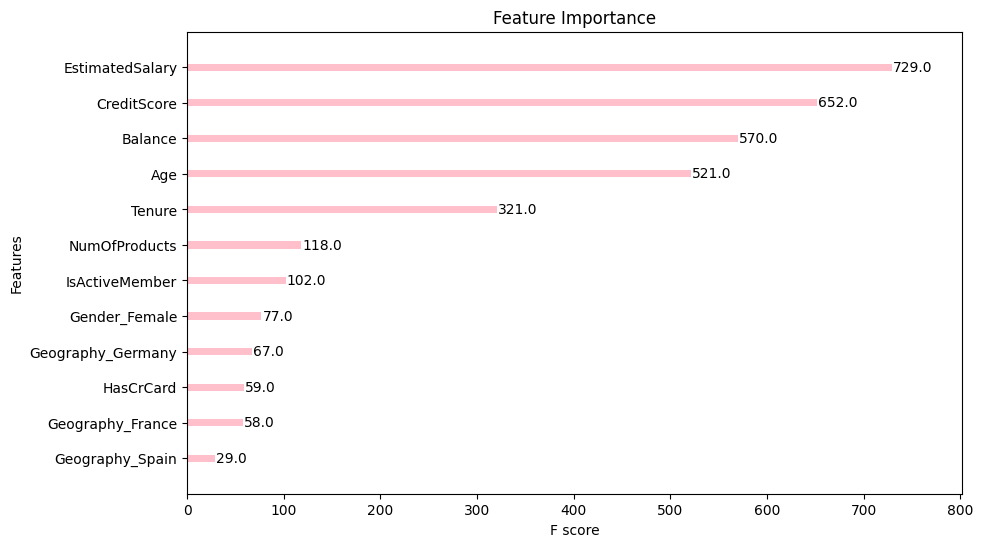

In [ ]:
#Plotting the important features to identify most significant factors contributing to churn
import matplotlib.pyplot as plt
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10, 6))
plot_importance(model, ax=ax, color='pink')
plt.title('Feature Importance')
plt.grid(False)
plt.show()

###Showing a Table of Actual vs. Predicted

In [ ]:
# Create a comparison DataFrame
comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

# Show first 10 rows
print(comparison.head(10))

   Actual  Predicted
0       0          0
1       0          0
2       1          1
3       0          0
4       0          0
5       0          0
6       0          0
7       0          0
8       1          1
9       0          0
